## 1 - Title

### 1.1 - Project Title

Beauty Products Warehouse Sales Forecasting Analysis in Paragon Corp

### 1.2 - Short Description

Paragon adalah perusahaan kecantikan/kosmetik Indonesia dengan tujuan menciptakan kebaikan yang lebih besar bagi masyarakat melalui inovasi. Produk dari Paragon adalah Wardah, Kahf, Make Over, dan Emina. Menargetkan segmentasi kelas menengah untuk kosmetik menarik karena pelanggan relatif tidak sensitif terhadap harga. Seperti halnya Paragon, merupakan
organisasi lokal yang menargetkan pelanggan kelas menengah di Indonesia [[1]](https://e-journal.unair.ac.id/JMTT/article/download/37451/22256/191646).

Gudang dalam suatu perusahaan harus disesuaikan dengan kondisi dan intensitas produksi di industri tersebut. Sedangkan pergudangan merupakan jalur penting dalam usaha perdagangan, karena terdapat barang industri dan produksi yang ada, seperti penerimaan bahan baku dari pemasok, penanganan barang, pengiriman barang sampai ke tujuan.

Sistem pengelolaan gudang sangat penting untuk kelangsungan usaha, karena gudang berhubungan langsung dengan penjualan. Ketika persediaan gudang tidak sesuai dengan penjualan, maka akan berdampak pada kerugian, baik karena penjualan yang gagal atau persediaan yang tersedia di gudang terlalu banyak. Sistem manajemen gudang yang tujuan utamanya adalah mengontrol semua proses yang terjadi di dalamnya seperti penerimaan, penyimpanan, proses pesanan pelanggan, pengambilan pesanan, pengecekan dan pengepakan serta pengiriman. Dengan adanya sistem manajemen gudang, kita dapat lebih mengontrol proses pergerakan dan penyimpanan, penggunaan ruang yang lebih optimal di gudang, meningkatkan efektivitas proses penerimaan dan pengiriman serta mengetahui jumlah stok dengan lebih akurat dari waktu ke waktu [[2]](https://www.sciencedirect.com/science/article/pii/S0969698921004690), [[3]](https://ejournal.unsrat.ac.id/v3/index.php/emba/article/view/30895).

Oleh karena itu, dalam analisis dan modeling kali ini akan memprediksi jumlah penjualan stok gudang milik Paragon dengan menggunakan dataset `sample_dataset_timeseries_noarea.csv`. Prediksi ini akan menggunakan Regresi Model dengan Time Series and Forecasting Analysis.

### 1.3 - Objective

Berdasarkan deskripsi di atas, maka tujuan dari analisis dan modeling ini adalah:
1. Mengetahui prediksi penjualan stok di gudang selama 13 pekan ke depan.
2. Mengetahui apakah prediksi penjualan stok gudang bagus atau tidak.
3. Mendapatkan model terbaik menggunakan Regresi Model untuk memprediksi penjualan pada stok gudang.

### 1.4 - Problem Statement

Berdasarkan tujuan di atas, makan problem statement dari analisis dan modeling pada data ini adalah:

1. Bagaimana prediksi penjualan stok di gudang untuk 13 pekan ke depan?
2. Apakah prediksi penjualan stok di gudang mengalami kenaikan atau penurunan?
3. Bagaimana cara menentukan model terbaik dalam regresi untuk memprediksi penjualan stok gudang?

## 2 - Introduction

Name: **Fadya Ulya Salsabila**

Batch: **RMT-018**

### About Me

Bila is a Biology graduate from Institut Teknologi Sepuluh Nopember (ITS), Surabaya (GPA: 3.72). Ever since Bila joined Zenius, Bila has been interested in technology companies. Bila learned a lot about content and how to create it on Education Technology. At that time, Bila also learned the Clojure programming language to create Biology questions.

Bila also builds hard skills through writing on her personal blog (Medium) and social media (Twitter). Her topic of interest is about science. Interested in data, now she is learning Python and building a portfolio at the same time. She is currently learning in Hacktiv8 with Full Time Data Science Program. Bila's experience in the field of data is also proven by her experience when she joined Belajarlagi as Class Operations. When she was as Class Operations, she analyzed student data using Spreadsheet and visualized it as a report to stakeholders.

Bila now have an interest in Data Analytics and Data Science. She is looking for opportunities in this field and would love to connect with you.

## 3 - External Link

Deployment: https://huggingface.co/spaces/fadyabila/sales-forecasting-analysis

## 4 - Working Area

### 4.1 - Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# For Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Metrics and Standarize the Datasets
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Others libraries for time series
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 15.6 MB/s eta 0:00:00


### 4.2 - Load Data

Bab ini berisi proses menampilkan data sebelum dilakukan eksplorasi data lebih lanjut.

In [ ]:
# Show data from csv file

data = pd.read_csv('/content/drive/MyDrive/Hacktiv8 - Fadya Ulya/phase 2/sample_dataset_timeseries_noarea.csv')
data

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


In [ ]:
# Show top 5 data

data.head()

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119


In [ ]:
# Show last 5 data

data.tail()

,week_number,week_start_date,week_end_date,product_item,quantity
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


In [ ]:
data.shape

(102733, 5)

Berdasarkan hasil load data serta menampilkan 5 data teratas dan 5 data terbawah, menunjukkan bahwa dataset `sample_dataset_timeseries_noarea.csv` memiliki `102733 kolom` dan `5 baris`.

Berikutnya adalah copy original dataset untuk backup, dan hasil copy akan digunakan dalam proses analisis serta modeling.

In [ ]:
# Copy dataset for backup

df1 = data.copy()

### 4.3 - Data Cleaning

Bab ini berisi proses pembersihan data sebelum dilakukan eksplorasi data lebih lanjut. Proses ini meliputi menampilkan info pada data, mengubah info data, cek duplikasi data, dan cek missing value.

#### 4.3.1 - Info Data

In [ ]:
# Menampilkan info data pada dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Berdasarkan info data di atas, `week_start_date dan week_end_date` masih dalam bentuk data `object`. Oleh karena itu, akan diubah menjadi tipe data `datetime` untuk memudahkan saat masuk dalam proses analisis. 

In [ ]:
#Change type data into datetime
df1['week_start_date'] = pd.to_datetime(df1['week_start_date'], format='%Y-%m-%d')
df1['week_end_date'] = pd.to_datetime(df1['week_end_date'], format='%Y-%m-%d')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


#### 4.3.2 - Missing Values

In [ ]:
# Show missing values

mv = df1.isna().sum()
print('\nJumlah missing value per kolom:\n', mv) 


Jumlah missing value per kolom:
 week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64


Setelah mengubah tipe data, selanjutnya adalah cek missing values pada dataset. Berdasarkan hasil di atas, menunjukkan bahwa terdapat 2 missing values pada `product_item`. Karena missing values < 5%, oleh sebab itu akan langsung di drop. Hal ini juga sesuai dengan pernyataan pada [laman ini](https://www.bing.com/ck/a?!&&p=a71c06ead53d1fbbJmltdHM9MTY4MTUxNjgwMCZpZ3VpZD0zMmViMTgxNS1kNjg2LTYzYmMtM2UwYS0wYTE2ZDdlMzYyOTImaW5zaWQ9NTM5Ng&ptn=3&hsh=3&fclid=32eb1815-d686-63bc-3e0a-0a16d7e36292&psq=when+you+should+drop+missing+values&u=a1aHR0cHM6Ly93d3cuc3RhdGlzdGljc3NvbHV0aW9ucy5jb20vZGlzc2VydGF0aW9uLXJlc291cmNlcy9taXNzaW5nLXZhbHVlcy1pbi1kYXRhLyM6fjp0ZXh0PUluJTIwc3RhdGlzdGljYWwlMjBsYW5ndWFnZSUyQyUyMGlmJTIwdGhlJTIwbnVtYmVyJTIwb2YlMjB0aGUsY2FzZXMlMjAlMjhyYXRoZXIlMjB0aGFuJTIwZG8lMjBpbXB1dGF0aW9uJTI5JTIwYW5kJTIwcmVwbGFjZSUyMHRoZW0u&ntb=1), bahwa missing value di bawah 5% dapat didrop.

In [ ]:
# Drop columns product_items that have missing value

df1 = df1.dropna(subset=['product_item'])

Setelah missing values didrop, maka akan dilakukan pengecekan ulang missing values. Seperti terlihat di bawah ini, **missing values pada dataset sudah tidak ada**.

In [ ]:
# Re-check missing values

mv = df1.isna().sum()
print('\nJumlah missing value per kolom:\n', mv) 


Jumlah missing value per kolom:
 week_number        0
week_start_date    0
week_end_date      0
product_item       0
quantity           0
dtype: int64


#### 4.3.3 - Duplikasi Data

In [ ]:
# Menampilkan duplikasi pada baris

duplicate = df1.duplicated().sum()
print("Duplicate Rows :", duplicate)

Duplicate Rows : 0


Pengecekan duplikasi data diperlukan untuk melihat apakah dataset memiliki data yang terduplikasi. Hal ini harus dilakukan pembersihan agar saat membuat model tidak ada bias data. Pernyataan ini juga didukung dengan pernyataan pada [deepchecks.com](https://deepchecks.com/what-is-data-cleaning/#:~:text=Datasets%20that%20contain%20duplicates%20may,do%20not%20exist%20in%20reality.), data yang berisi duplikat dapat mengkontaminasi data pelatihan dengan data uji atau sebaliknya. Menggunakan data yang masih terdapat duplikat dapat membuat model memiliki performa buruk bahkan tidak terdeteksi.

Berdasarkan hasil di atas, menunjukkan bahwa dataset **tidak memiliki duplikasi data**. Karena data sudah dilakukan cleaning, maka dapat masuk dalam proses selanjutnya yaitu eksplorasi data sederhana.

### 4.4 - Exploratory Data Analysis (EDA)

Bab ini berisi eksplorasi data sederhana untuk melihat trend penjualan jumlah produksi (quantity) setiap minggu. EDA pada proses ini meliputi:
1. Melihat jenis dan jumlah product item.
2. Analisis penjualan berdasarkan tanggal awal.
3. Melihat seasonality: tahun, bulan, dan minggu.
4. Melihat trend data penjualan.
5. Model Plot.
6. Analisis statistik deskriptif.

#### 4.4.1 - Jumlah Product Item

In [ ]:
# Sum of product item

len(df1['product_item'].unique())

2309

In [ ]:
# Product item of sales data

df1.product_item.value_counts()

0073377087c7ddace313ff829cd7b0b3    67
870b3ad8c41b746b29ba31f6e4040950    67
9264576b8833b892b34a39525bcdd271    67
921cfbd1930eeee6b82a7b053c4ed8dc    67
91f65f29b32c39788b4294cbe2be7024    67
                                    ..
d97d3a3e53124b6b1a8313403f54f6b8     1
d963020bd8d76659c6768ad252be9629     1
d4e90f2dcbcf53757d6bd1f3b6f368cb     1
170ad92bf82a3509886ceb841cd6e3c3     1
ff9d05a4d6f922b3ab1653f58165b8ce     1
Name: product_item, Length: 2309, dtype: int64

Hasil di atas menunjukkan bahwa terdapat `2309 product items` yang berbeda. Di mana product item paling banyak muncul yaitu sebanyak `67 kali` dan yang paling sedikit muncul adalah `1 kali`.

Berdasarkan hasil di atas, dapat dikatakan bahwa `product_item` pada dataset merupakan `SKU (Stock Keeping Unit)`. *Stock Keeping Unit* adalah suatu kode unik yang ditambahkan pada setiap barang atau produk, baik yang dijual maupun dibeli oleh para pelaku wirausaha. Bisa didefinisikan juga bahwa *stock keeping unit* (SKU) adalah metode penamaan pada tiap produk yang akan ditawarkan atau dijual. 

Umumnya, SKU dibuat dalam urutan atau deretan angka serta huruf yang akan dilabelkan pada suatu produk dan secara otomatis menjadi identitas produk tersebut. Inilah yang menyebabkan SKU juga kadang disebut sebagai *part number*, *product number*, atau *product identifier*. Deretan angka yang menjadi kode unik itulah yang bisa dijadikan sebagai pembeda antara suatu item barang yang satu dengan barang yang lainnya [[4]](https://majoo.id/solusi/detail/stock-keeping-unit-adalah), [[5]](https://glints.com/id/lowongan/sku-adalah/#.ZDp4irpBzrc). 

**Jenis SKU**

Ada beberapa jenis SKU yang biasa digunakan oleh para pemilik bisnis. Biasanya, penggolongan dilakukan berdasarkan beberapa hal seperti berikut:

*   Berdasarkan jenis barang yang dijual.
*   Berdasarkan produk intangible.

**Manfaat SKU**

Beberapa manfaat SKU adalah:

* Memudahkan staff gudang dalam melakukan pencarian produk secara manual.
* Mempercepat proses transaksi bisnis yang sedang dijalankan.
* Secara tidak langsung dapat melancarkan distribusi barang produksi dari gudang kepada konsumen.
* Memudahkan pihak manajemen untuk melakukan analisis bisnis produk. 
* Khususnya untuk produk yang paling laku keras dan yang kurang laku. 
* Memudahkan proses pencatatan data penjualan harian hingga bulanan.
* Memudahkan pemilik bisnis untuk merencanakan suplai terhadap sebuah produk.

`product_item` pada dataset ini merupakan SKU dari Paragon. Dapat dikatakan bahwa ini adalah kode unik pada barang jenis *make-up* untuk memudahkan pelacakan penjualan serta investarisasi. Dataset ini memiliki `2309` jenis *make-up* yang dijual.

In [ ]:
# Product item range

df1['week_start_date'].min(), df1['week_end_date'].max()

(Timestamp('2021-12-27 00:00:00'), Timestamp('2023-04-09 00:00:00'))

Berdasarkan hasil di atas, menunjukkan bahwa penjualan stok (`quantity`), dimulai pada tanggal **27 Desember 2021 dan berakhir pada 9 April 2023**. Di mana penjualan tersebut dilakukan secara mingguan.

Merujuk pada tampilan dataset, dari mulai produk dijual (`week_start_date`) hingga produk habis terjual (`week_end_date`) membutuhkan waktu 1 minggu atau 7 hari.

#### 4.4.2 - Analisis Penjualan Berdasarkan Tanggal Awal

In [ ]:
# Copy dataframe to add new columns

df_add_start = df1.copy()

In [ ]:
# Groupby week_start_date with quantity

quantity_flow = df_add_start.groupby('week_start_date')['quantity'].sum().reset_index()
quantity_flow

,week_start_date,quantity
0,2021-12-27,128808
1,2022-01-03,3839557
2,2022-01-10,4138934
3,2022-01-17,4149077
4,2022-01-24,4824273
...,...,...
62,2023-03-06,4775638
63,2023-03-13,4787111
64,2023-03-20,4757590
65,2023-03-27,6001166


Kolom jumlah dari produk terjual (`quantity`) dikelompokkan berdasarkan `week_start_date`, dimaksudkan untuk mengetahui berapa stok produk yang berhasil terjual setiap minggunya. Berdasarkan hasil di atas, terdapat `67 minggu` penjualan dengan jumlah produk yang berbeda-beda setiap minggunya. 

Perbedaan jumlah produk/barang yang terjual dapat memengaruhi stok gudang yang belum terjual. Hal ini dapat menyebabkan produk yang disimpan terlalu lama juga lumayan memakan tempat dan berisiko rusak, cacat, atau bahkan hilang dan dicuri [[6]](https://www.paper.id/blog/tips-dan-nasihat-umkm/selisih-stock-gudang/).

Kemudian dibuat trend penjualan setiap minggu seperti di bawah ini, untuk mengetahui tingkat kenaikan dan penurunan penjualan stok gudang tiap minggu.

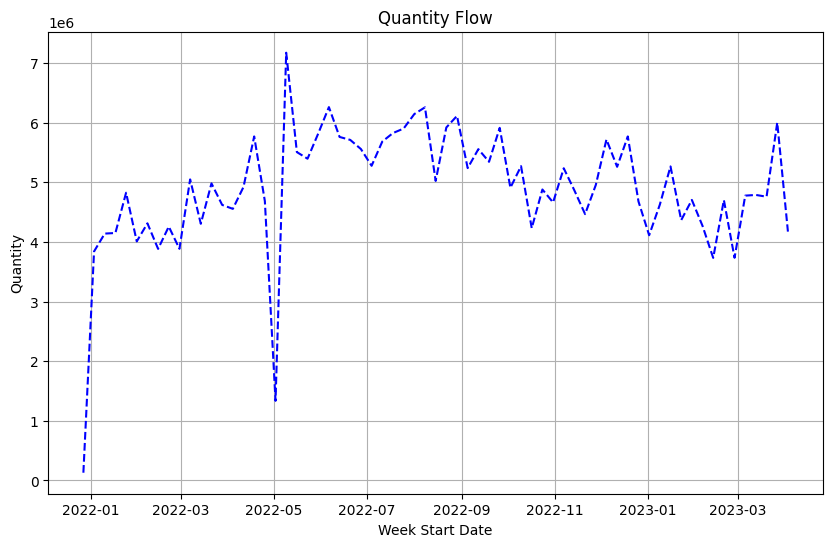

In [ ]:
# Create a new figure with size (10, 6)
plt.figure(figsize=(10, 6))

# Create a line plot of the full time series of daily sales 
# Using the DataFrame’s plot() method
plt.plot(quantity_flow['week_start_date'], quantity_flow['quantity'], color='blue', linestyle='dashed')
plt.title('Quantity Flow')
plt.xlabel('Week Start Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

Visualisasi trend grafik di atas menunjukkan bahwa penjualan stok gudang terjadi secara fluktuatif. Khususnya pada bulan **Mei 2022** menunjukkan bahwa penjualan turun drastis dari April 2022.

Hal ini dapat dipengaruhi oleh faktor-faktor [[7]](https://repository.bsi.ac.id/index.php/unduh/item/284153/File_10-BAB-II--Landasan-Teori.pdf), sebagai berikut:
1. Daya beli konsumen
2. Selera konsumen yang berubah
3. Tren dan tingkat persaingan pasar
4. Acara/hari libur tertentu

Dapat dikatakan bahwa pada saat bulan Mei 2022, yang terdapat libur Hari Raya Idul Fitri selama 10 hari, menyebabkan penjualan *make-up* mengalami penurunan. Hal ini disebabkan karena pada saat libur lebaran, banyak operasional bisnis yang juga libur. Sehingga pada kasus Paragon ini dapat dikatakan juga demikian.

Saat libur lebaran, para pelaku bisnis dihadapkan dengan tantangan kecukupan staf. Bisnis yang tetap beroperasi selama [lebaran](https://www.idntimes.com/business/economy/hana-adi-perdana-1/4-tips-pengelolaan-bisnis-saat-musim-libur-lebaran), pengaturan presensi, absensi karyawan yang standby, dan cuti menjadi hal yang krusial. Sehingga karyawan yang bekerja pada saat libur lebaran lebih sedikit dan terkadang toko terkait juga menerapkan libur 2 hari hingga satu minggu. Hal ini yang menyebabkan penurunan penjualan.

In [ ]:
# Indexing with Time Series Data

quantity_flow_in = quantity_flow.set_index('week_start_date')
quantity_flow_in.index

DatetimeIndex(['2021-12-27', '2022-01-03', '2022-01-10', '2022-01-17',
               '2022-01-24', '2022-01-31', '2022-02-07', '2022-02-14',
               '2022-02-21', '2022-02-28', '2022-03-07', '2022-03-14',
               '2022-03-21', '2022-03-28', '2022-04-04', '2022-04-11',
               '2022-04-18', '2022-04-25', '2022-05-02', '2022-05-09',
               '2022-05-16', '2022-05-23', '2022-05-30', '2022-06-06',
               '2022-06-13', '2022-06-20', '2022-06-27', '2022-07-04',
               '2022-07-11', '2022-07-18', '2022-07-25', '2022-08-01',
               '2022-08-08', '2022-08-15', '2022-08-22', '2022-08-29',
               '2022-09-05', '2022-09-12', '2022-09-19', '2022-09-26',
               '2022-10-03', '2022-10-10', '2022-10-17', '2022-10-24',
               '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
               '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19',
               '2022-12-26', '2023-01-02', '2023-01-09', '2023-01-16',
      

Kemudian kolom `week_start_date` diubah dalam bentuk index, sehingga memudahkan tracking per minggu. Setelah diubah dalam bentuk index, selanjutnya adalah menambah kolom baru yaitu tahun, bulan, dan hari untuk informasi yang lebih detail terkait penjualan stok setiap minggunya.

In [ ]:
# Add columns with year, month, and weekday name in week_start_date
quantity_flow_in['year'] = pd.DatetimeIndex(quantity_flow_in.index).year
quantity_flow_in['month'] = pd.DatetimeIndex(quantity_flow_in.index).month
quantity_flow_in['day'] = pd.DatetimeIndex(quantity_flow_in.index).day_name()

# Display all rows
quantity_flow_in

,quantity,year,month,day
week_start_date,,,,
2021-12-27,128808,2021,12,Monday
2022-01-03,3839557,2022,1,Monday
2022-01-10,4138934,2022,1,Monday
2022-01-17,4149077,2022,1,Monday
2022-01-24,4824273,2022,1,Monday
...,...,...,...,...
2023-03-06,4775638,2023,3,Monday
2023-03-13,4787111,2023,3,Monday
2023-03-20,4757590,2023,3,Monday


Berdasarkan hasil penambahan kolom di atas, menunjukkan bahwa penjualan setiap minggunya dimulai pada hari `Senin` dan setiap bulannya terdapat `4-5 kali` penjualan tergantung dari umur hari pada bulan tersebut. 

#### 4.4.3 - Statistik Deskriptif

In [ ]:
# Check the descriptive statistic

quantity_flow_in.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,67.0,4.893709e+06,1.044440e+06,128808.0,4337715.5,4907074.0,5619344.0,7172144.0
year,67.0,2.022194e+03,4.348042e-01,2021.0,2022.0,2022.0,2022.0,2023.0
month,67.0,5.626866e+00,3.663232e+00,1.0,2.0,5.0,9.0,12.0


Hasil statistik deskriptif di atas, menunjukkan bahwa jumlah penjualan (`quantity`) **paling sedikit** adalah sebanyak **128808 produk** di mana terjadi pada minggu paling awal, yaitu **27 Desember 2021**. Dengan **maksimal** produk terjual adalah sebanyak 7172144 produk.

**Rata-rata** produk terjual setiap minggunya adalah 4893709 produk. Sedangkan nilai tengah produk adalah sebanyak 4907074 produk. Penjualan produk tersebut dimulai dari 2021-2023. 

In [ ]:
# Find the row with the maximum quantity value
max_row = quantity_flow_in.loc[quantity_flow_in['quantity'].idxmax()]
max_row

quantity    7172144
year           2022
month             5
day          Monday
Name: 2022-05-09 00:00:00, dtype: object

Berdasarkan hasil di atas, menunjukkan bahwa penjualan terbanyak yaitu `7172144 produk` terjadi pada tanggal **9 Mei 2022**. Ini mengindikasikan bahwa setelah libur lebaran usai, peminat pembeli meningkat kembali disertai dengan aktifnya sektor bisnis. Penurunan penjualan terjadi pada minggu akhir April ke minggu pertama Mei, di mana Hari Raya Idul Fitri jatuh pada tanggal 2 dan 3 Mei 2022.

#### 4.4.4 - Checking for Seasonality

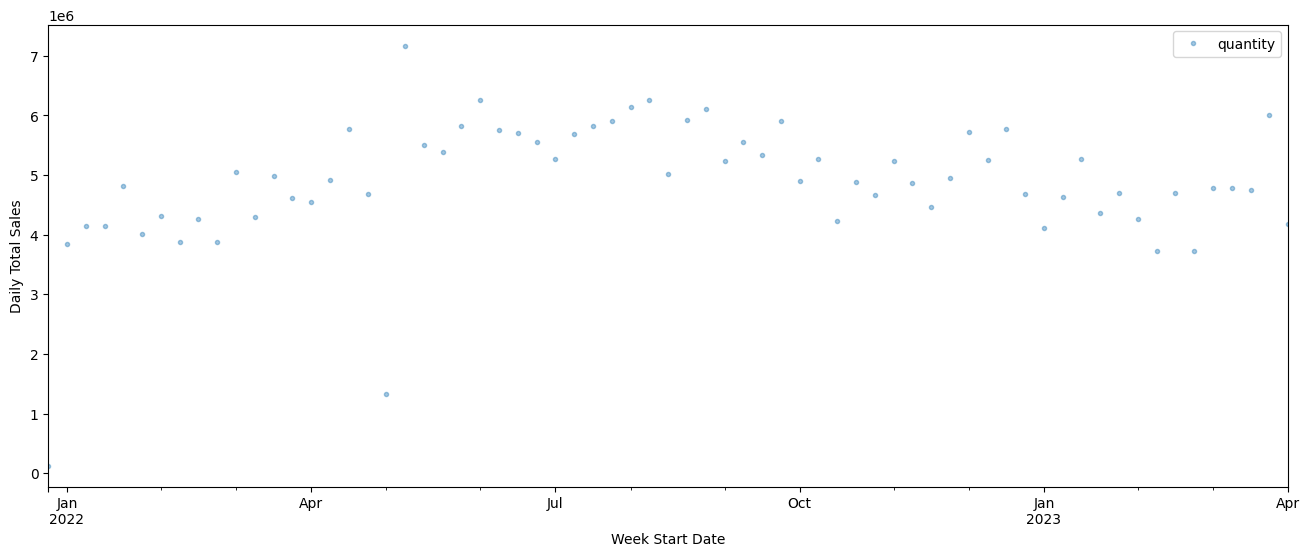

In [ ]:
# Use seaborn style defaults and set the default figure size

cols_plot = ['quantity']

axes      = quantity_flow_in[cols_plot].plot(marker='.',
                                          alpha=0.4, 
                                          linestyle='None', 
                                          figsize=(16, 6), 
                                          subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Total Sales')
    ax.set_xlabel('Week Start Date')

Tujuan dari mengecek `seasonality` pada analisis time series dan penjualan produk adalah untuk memahami pola-pola yang terjadi dalam data penjualan seiring dengan waktu, dan menentukan apakah ada perubahan pola-pola tersebut pada suatu periode tertentu dalam satu tahun atau lebih. 

Dengan mengecek seasonality, dapat mengetahui pola penjualan suatu produk dalam setiap musim atau periode yang berbeda dalam satu tahun, serta mengidentifikasi faktor-faktor yang mempengaruhi perubahan pola tersebut, seperti perubahan musim, liburan, atau acara khusus lainnya. Hal ini dapat membantu dalam merencanakan strategi bisnis dan pemasaran yang lebih efektif, seperti menyesuaikan stok produk, menentukan harga, atau menargetkan kampanye promosi untuk mendorong penjualan.

Selain itu, mengecek seasonality juga dapat membantu dalam memprediksi penjualan di masa depan, karena dapat memperhitungkan pola-pola musiman yang terjadi dalam data penjualan sebelumnya. Dengan memahami pola-pola ini,  sehingga dapat membuat model prediksi yang lebih akurat dan meningkatkan kualitas keputusan bisnis yang diambil.

Untuk mempermudah analisis data, akan dilakukan plot series untuk setiap tahun, bulan, dan minggu. Pertama, akan dilakukan visualisasi data **penjualan tiap tahun tanpa resampling**.

#### Yearly Sales - No Resampling

In [ ]:
# Show sales start from 2021

quantity_flow_in.loc['2021':]

,quantity,year,month,day
week_start_date,,,,
2021-12-27,128808,2021,12,Monday
2022-01-03,3839557,2022,1,Monday
2022-01-10,4138934,2022,1,Monday
2022-01-17,4149077,2022,1,Monday
2022-01-24,4824273,2022,1,Monday
...,...,...,...,...
2023-03-06,4775638,2023,3,Monday
2023-03-13,4787111,2023,3,Monday
2023-03-20,4757590,2023,3,Monday


<Axes: xlabel='week_start_date'>

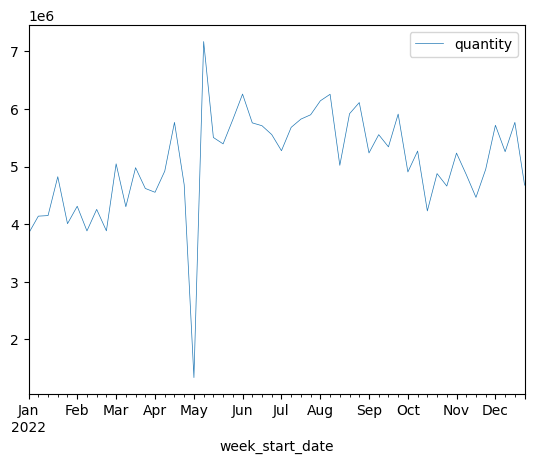

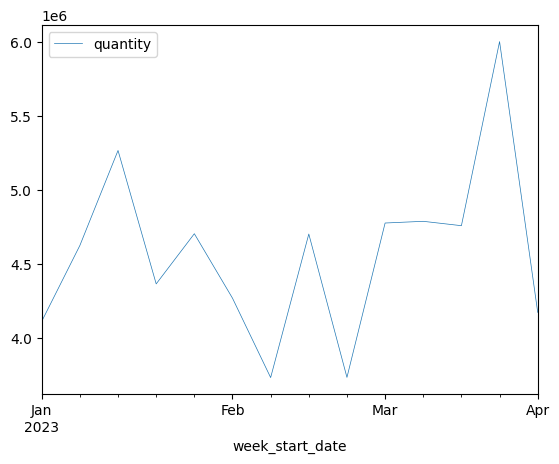

In [ ]:
# Show visualization of yearly sales, except 2021 because just one month

cols_plot = ['quantity']

quantity_flow_in.loc['2022'][cols_plot].plot(linewidth=0.5)
quantity_flow_in.loc['2023'][cols_plot].plot(linewidth=0.5)

Pada penjualan produk dilihat dari tren tahunan di atas, menunjukkan bahwa:

*   Pada tahun 2022, penjualan turun dari tanggal **25 April 2022 sebanyak	4684319	produk menjadi 1334134 produk pada 2 Mei 2022**. Hal ini disebabkan karena adanya libur hari Raya Idul Fitri 1443 H.
*   Awal tahun, selalu terjadi **kenaikan penjualan**, baik itu 2022 maupun 2023. Hal ini bisa dikarenakan akibat adanya Natal dan Tahun Baru.
*  Tren penjualan fluktuatif, mengalami kenaikan dan penurunan secara begantian.


#### Weekly Sales - Resampling

In [ ]:
# Weekly sales
data_columns = ['quantity']

# Resample to weekly frequency, aggregating with mean
quantity_flow_in_weekly = quantity_flow_in[data_columns].resample('W').sum()
quantity_flow_in_weekly.head()

,quantity
week_start_date,
2022-01-02,128808
2022-01-09,3839557
2022-01-16,4138934
2022-01-23,4149077
2022-01-30,4824273


<Axes: xlabel='week_start_date'>

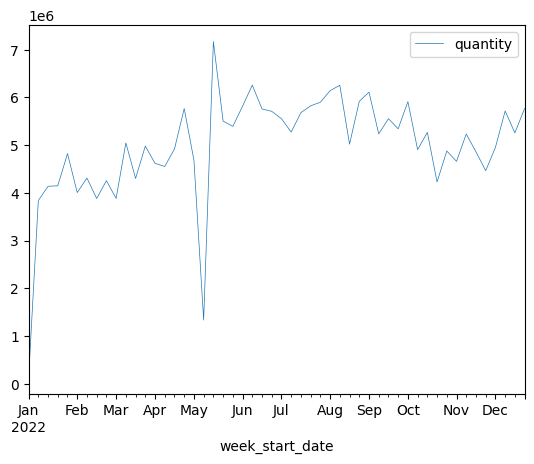

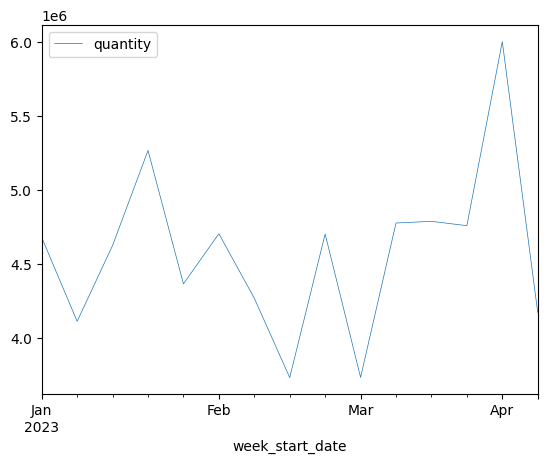

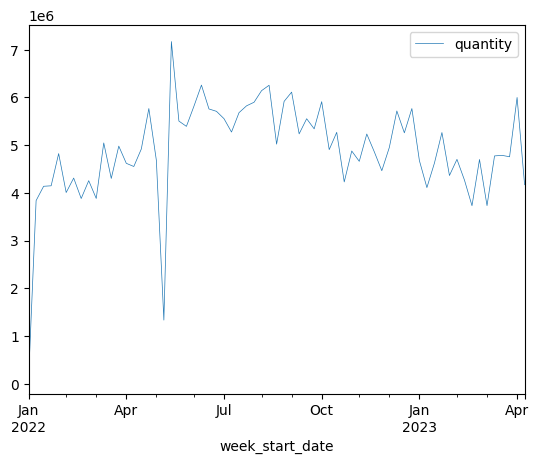

In [ ]:
# Show visualization of weekly sales

cols_plot = ['quantity']

quantity_flow_in_weekly.loc['2022'][cols_plot].plot(linewidth=0.5)
quantity_flow_in_weekly.loc['2023'][cols_plot].plot(linewidth=0.5)
quantity_flow_in_weekly[cols_plot].plot(linewidth=0.5)

Pada penjualan produk dilihat dari tren mingguan di atas, menunjukkan bahwa:

* Hasil tren sama seperti dilihat dari sudut pandang tahunan, yaitu mengalami kenaikan dan penurunan setiap bulannya.
* Kenaikan penjualan dimungkinkan karena adanya event tanggal dan bulan sama, yaitu `1.1, 2.2, 3.3, ... 12.12` di seluruh *ecommerce*, di mana penjual menawarkan potongan harga dan gratis ongkir yang sangat fantastis. Sehingga hal ini dapat meningkatkan penjualan.
* Kenaikan penjualan juga dimungkinkan karena ada campaign pada *ecommerce hijau (Tokopedia)* yaitu `gratis ongkis pada tanggal gajian: 25`. Sehingga orang-orang yang habis gajian dapat membeli produk *makeup* dengan potongan harga menggiurkan.
* Penurunan penjualan dapat dikarenakan libur lebaran dan natal serta di luar tanggal promo tertentu dan *campaign*. Ini dapat memengaruhi psikologis pembeli, karena beberapa pembeli menganggap harga normal adalah mahal.

#### Monthly Sales - Resampling

In [ ]:
# monthly sales
data_columns = ['quantity']

# Resample to weekly frequency, aggregating with mean
quantity_flow_in_monthly = quantity_flow_in[data_columns].resample('M').sum()
quantity_flow_in_monthly.head(5)

,quantity
week_start_date,
2021-12-31,128808
2022-01-31,20959868
2022-02-28,16333997
2022-03-31,18952067
2022-04-30,19928123


<Axes: xlabel='week_start_date'>

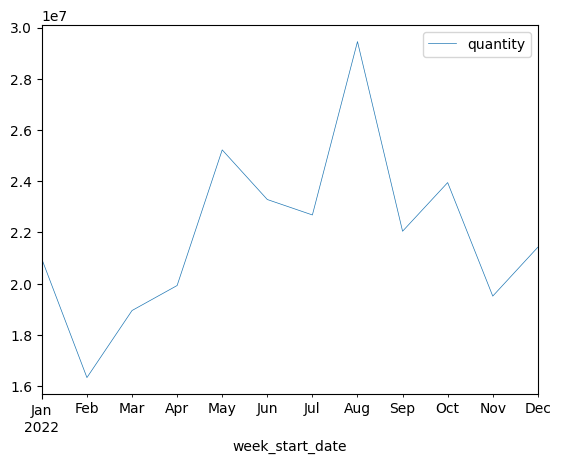

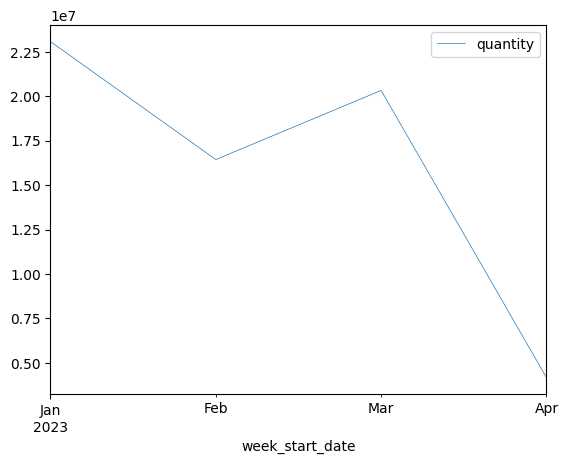

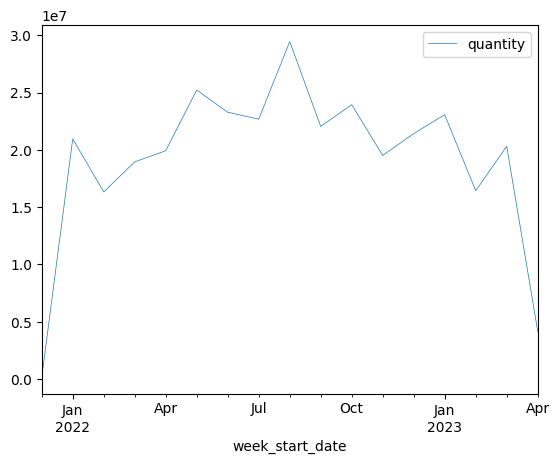

In [ ]:
# Show visualization of monthly sales

cols_plot = ['quantity']

quantity_flow_in_monthly.loc['2022'][cols_plot].plot(linewidth=0.5)
quantity_flow_in_monthly.loc['2023'][cols_plot].plot(linewidth=0.5)
quantity_flow_in_monthly[cols_plot].plot(linewidth=0.5)

Pada penjualan produk dilihat dari tren bulanan di atas, menunjukkan bahwa:

*   Masuk awal tahun (bulan Januari), penjualan meningkat karena bertepatan dengan Natal dan Tahun Baru. Serta awal tahun banyak tersedia tawaran diskon yang banyak.
*   Terlihat bahwa memasuki bulan April 2022 dan Maret 2023, terjadi kenaikan penjualan karena bertepatan dengan bulan puasa (Ramadan), sehingga tingkat konsumsi pembeli meningkat.
*  Pada bulan Agustus 2022 terlihat bahwa terjadi kenaikan penjualan tertinggi, hal ini bisa dikarenakan pada bulan tersebut adalah Hari Kemerdekaan Indonesia. Pada bulan tersebut terdapat banyak *campaign*, diskon spesial kemerdekaan, serta mungkin adanya* collaborative marketing* antar *influencers*.



#### 4.4.5 - Checking For Trend

In [ ]:
# Define a function to check trend and plot

def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.xticks(rotation=90)
    plt.plot(X_df, 
             marker='.', 
             linestyle='-', 
             linewidth=0.5,
             color='blue',  
             label='Original')
    
    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
             marker='o', 
             markersize=8, 
             linestyle='-', 
             linewidth=0.5,
             color='orange',
             label='Regression line');
    plt.legend()
    plt.show()

Slope 319495.9370629371
NRMSE: 0.2313391001411843


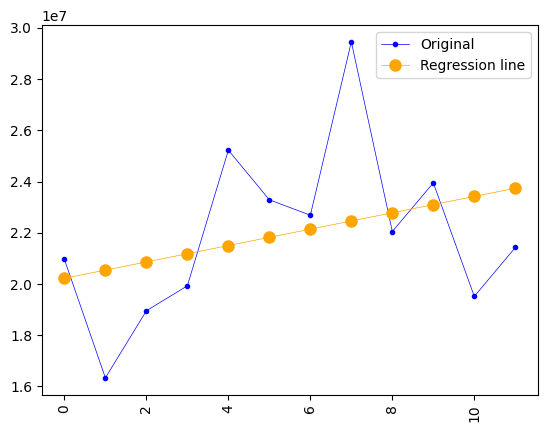

Slope -5280253.399999998
NRMSE: 0.22030897573787028


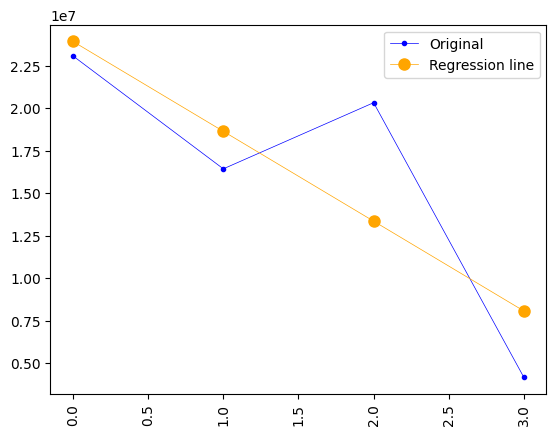

Slope [94610.0245098]
NRMSE: 0.2379210923168305


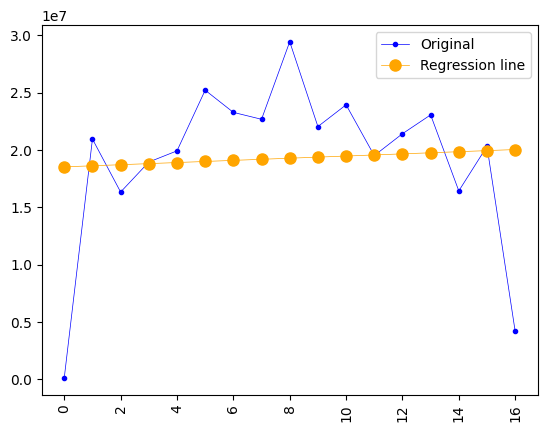

In [ ]:
# Check for trend of monthly sales
cols_plot = ['quantity']

detect_trend(quantity_flow_in_monthly.loc['2022']['quantity'].values)
detect_trend(quantity_flow_in_monthly.loc['2023']['quantity'].values)
detect_trend(quantity_flow_in_monthly[cols_plot].values)

Berdasarkan hasil trend bulanan di atas, menunjukkan bahwa:

*   Penjualan produk cenderung meningkat setiap bulannya.
*   Penjualan produk mulai mengalami penurunan ketika saat memasuki libur lebaran.
*   Awal tahun cenderung mengalami peningkatan.



#### 4.4.6 - Model Plot

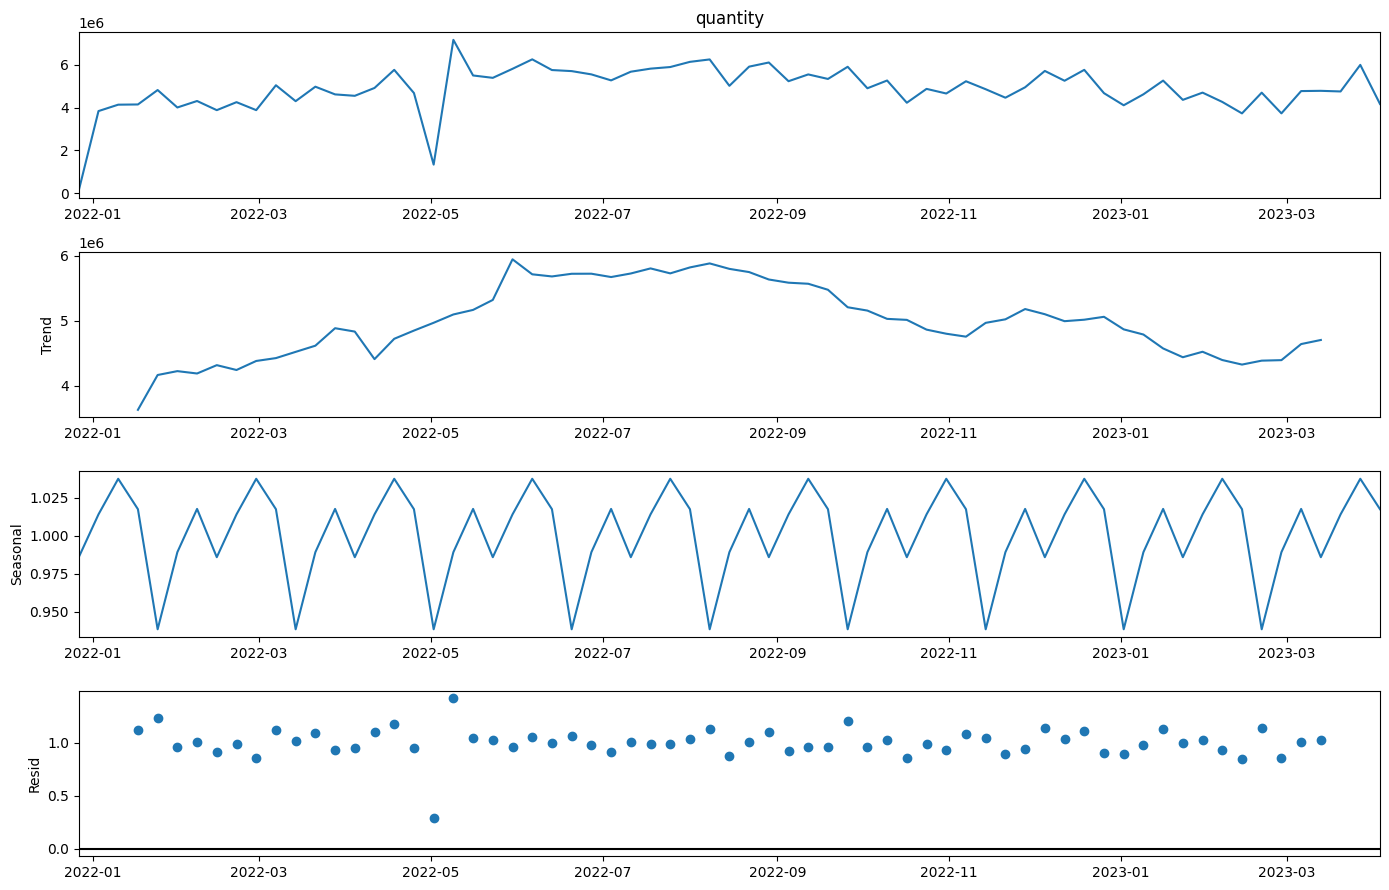

In [ ]:
pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(quantity_flow_in['quantity'], model='multiplicatif', period=7)
ax = res.plot()
plt.show()

Visualisasi `seasonal decompose` pada grafik di atas menunjukkan bahwa:

*   Penjualan produk pada stok gudang bukan merupakan penjualan seasonal, karena perubahan daya jual pembeli disebabkan karena event/libur tertentu di mana terdapat perubahan tanggal di tahun selanjutnya.
*   Penjualan tertinggi ketika masuk dalam bulan diskon besar, *campaign* tertentu, acara tahunan seperti kemerdekaan, memasuki bulan Ramadan, akhir dan awal tahun.



### 4.5 - Data Preprocessing

Bab ini berisi split data features dan target, split train dan test-set, scaling, serta transform. Pada proses ini bertujuan untuk normalisasi data agar dapat digunakan dalam modeling.

#### 4.5.1 - Show Data Target

In [ ]:
# Display 10 First Data

quantity_flow.head(10)

,week_start_date,quantity
0,2021-12-27,128808
1,2022-01-03,3839557
2,2022-01-10,4138934
3,2022-01-17,4149077
4,2022-01-24,4824273
5,2022-01-31,4008027
6,2022-02-07,4311010
7,2022-02-14,3882636
8,2022-02-21,4256541
9,2022-02-28,3883810


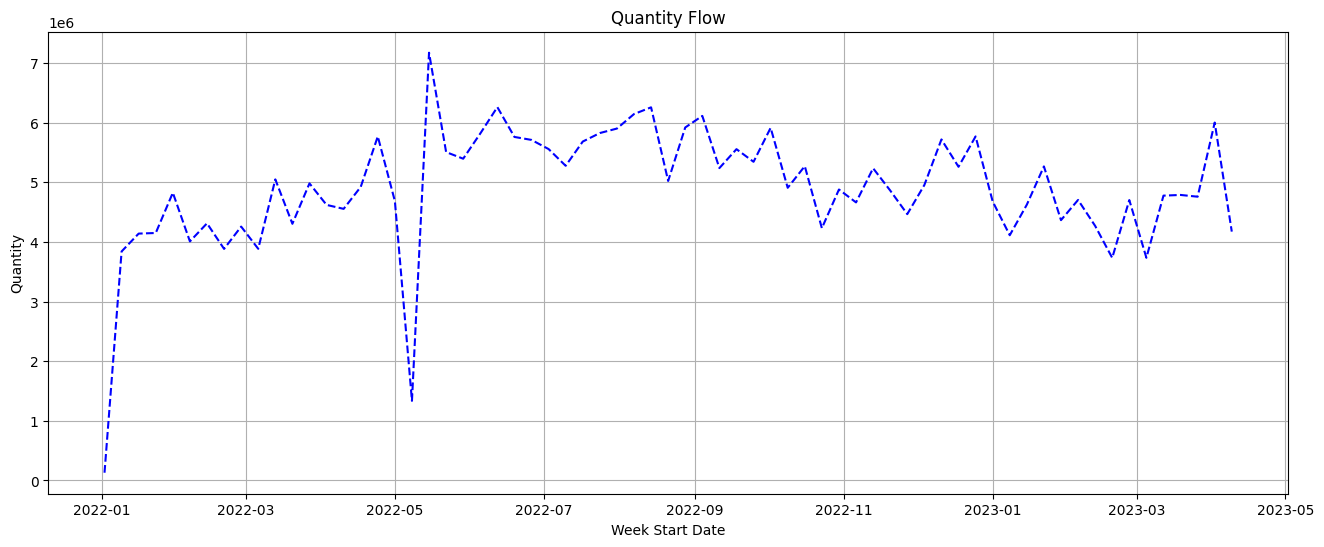

In [ ]:
# convert week_start_date to datetime object
df_add_start['week_start_date'] = pd.to_datetime(df_add_start['week_start_date'])

# set week_start_date as index
df_add_start.set_index('week_start_date', inplace=True)

# aggregate quantity by week
quantity_flow1 = df_add_start.groupby(pd.Grouper(freq='W'))['quantity'].sum()

# plot data
plt.figure(figsize=(16, 6))
plt.plot(quantity_flow1.index, quantity_flow1.values, color='blue', linestyle='dashed')
plt.title('Quantity Flow')
plt.xlabel('Week Start Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

#### 4.5.2 - Split Between Feature (`X`) and Target (`y`)

In [ ]:
# Create A New Dataset with `window=2`

window = 2
X = []
y = []

for index in range(0, len(quantity_flow1)-window):
  X.append(quantity_flow1[index : window + index])
  y.append(quantity_flow1[window + index])

X = np.array(X)
y = np.array(y)

print('X : ', X, X.shape)
print('y : ', y, y.shape)

X :  [[ 128808 3839557]
 [3839557 4138934]
 [4138934 4149077]
 [4149077 4824273]
 [4824273 4008027]
 [4008027 4311010]
 [4311010 3882636]
 [3882636 4256541]
 [4256541 3883810]
 [3883810 5047898]
 [5047898 4303200]
 [4303200 4980761]
 [4980761 4620208]
 [4620208 4553719]
 [4553719 4921338]
 [4921338 5768747]
 [5768747 4684319]
 [4684319 1334134]
 [1334134 7172144]
 [7172144 5505616]
 [5505616 5394786]
 [5394786 5817233]
 [5817233 6260083]
 [6260083 5759699]
 [5759699 5709933]
 [5709933 5556481]
 [5556481 5275889]
 [5275889 5682207]
 [5682207 5824993]
 [5824993 5900392]
 [5900392 6143352]
 [6143352 6256332]
 [6256332 5021634]
 [5021634 5918497]
 [5918497 6112693]
 [6112693 5237531]
 [5237531 5554898]
 [5554898 5343014]
 [5343014 5912301]
 [5912301 4907074]
 [4907074 5269967]
 [5269967 4229764]
 [4229764 4878485]
 [4878485 4661839]
 [4661839 5234579]
 [5234579 4861820]
 [4861820 4465411]
 [4465411 4953197]
 [4953197 5717901]
 [5717901 5259200]
 [5259200 5768419]
 [5768419 4677997]
 [46779

In [ ]:
# Combines `X` and `y` into One DataFrame

X_y_df = pd.concat([pd.DataFrame(X, columns=['X0', 'X1']), pd.DataFrame(y, columns=['y'])], axis=1)
X_y_df

,X0,X1,y
0,128808,3839557,4138934
1,3839557,4138934,4149077
2,4138934,4149077,4824273
3,4149077,4824273,4008027
4,4824273,4008027,4311010
...,...,...,...
60,4701262,3732954,4775638
61,3732954,4775638,4787111
62,4775638,4787111,4757590
63,4787111,4757590,6001166


In [ ]:
# Splitting Dataset

train_size = round(len(X)*0.8)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

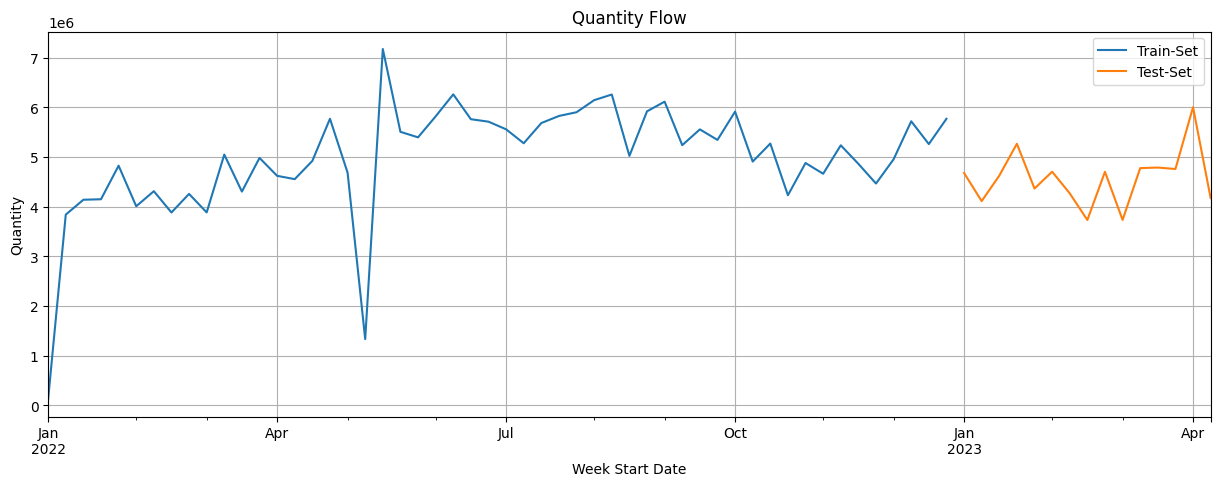

In [ ]:
# Trend Visualization of train-set and test-set
# Plot the training and testing data
plt.figure(figsize=(15, 5))
quantity_flow1[:train_size].plot.line(label='Train-Set')
quantity_flow1[train_size:].plot.line(label='Test-Set')

# Add a title, axis labels, and legend
plt.title('Quantity Flow')
plt.xlabel('Week Start Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

#### 4.5.5 - Scaling

Scaling menggunakan MinMax Scaler karena data penjualan produk termasuk data yang variatif dan tidak terdistribusi normal.

In [57]:
# Feature Scaling

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.6 - Model Training and Evaluation

Pada Model Training, akan dilakukan definisi model dan train data. Modeling penjualan produk pada stok gudang menggunakan `Supervised Machine Learning: Regression`. **Regresi linear** adalah teknik statistik yang digunakan untuk memodelkan hubungan antara dua variabel yang kontinu, yaitu variabel independen (x) dan variabel dependen (y). Regresi linear cocok digunakan pada *time series* karena seringkali terdapat hubungan linier antara variabel dependen dan waktu (variabel independen) pada data *time series*.

Setelah dilakukan EDA untuk mengecek trend menggunakan regresi linear, terbukti bahwa terdapat hubungan linear antara jumlah produk dengan waktu. Hal ini dapat dilihat berdasarkan fluktuatifnya data penjualan setiap waktu tertentu.

Modeling ini akan menggunakan empat algoritma Regresi, yaitu:
1. Linear Regression
2. XGB Regressor
3. Random Forest Regressor
4. Gradient Boosting Regressor

Dari keempat uji model tersebut, akan dilakukan training menggunakan **Baseline Model** serta **Improvement Model** (dengen *hyperparameter tuning*). Metrics yang digunakan dalam modeling ini adalah **MAE (Mean Absolute Error)**.

MAE digunakan dalam mengukur seberapa baik model regresi dapat memprediksi nilai target yang kontinu. MAE mengukur rata-rata kesalahan absolut antara nilai aktual dan nilai prediksi dari model. Dalam kasus regresi, MAE dapat digunakan untuk:

* **Mengukur kualitas prediksi model**. Semakin kecil nilai MAE, semakin baik kualitas prediksi model.
* **Membandingkan performa antara model regresi**. Dapat membandingkan MAE antara beberapa model regresi yang berbeda untuk memilih model yang memiliki performa terbaik.
* **Memberikan informasi tentang kesalahan prediksi**. Nilai MAE dapat memberikan informasi tentang seberapa besar kesalahan prediksi dalam satuan yang sama dengan variabel dependen, sehingga mudah dipahami dan diinterpretasikan.

Setelah itu, keempat hasil Baseline dan Improvement akan dibandingkan serta dicari nilai MAE terkecil dan gap terkecil antara Train-Set dan Test-Set. Hal tersebut adalah cara untuk mencari model terbaik.



#### 4.6.1 - Linear Regression

#### Baseline

In [ ]:
# Model Training Linear Regression Baseline

model_lr = LinearRegression()
model_lr.fit(X_train_scaled,y_train)

y_pred_train = model_lr.predict(X_train_scaled)
y_pred_test = model_lr.predict(X_test_scaled)

print('Train MAE:',mean_absolute_error(y_train,y_pred_train))
print('Test MAE:',mean_absolute_error(y_test,y_pred_test))

Train MAE: 569021.6492159483
Test MAE: 531353.6376728999


#### Improvement

In [ ]:
# Define grid for Linear Regression

parameters_lr = {'fit_intercept': [True, False],
                 'copy_X': [True, False]}
              
grid_lr = GridSearchCV(estimator=model_lr, param_grid = parameters_lr, cv = 5, scoring='neg_mean_absolute_error')
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Show results from Grid Search Linear Regression

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lr.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_lr.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_lr.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LinearRegression(fit_intercept=False)

 The best score across ALL searched params:
 -632658.9400177754

 The best parameters across ALL searched params:
 {'copy_X': True, 'fit_intercept': False}


In [ ]:
# Model Training Linear Regression Improvement using best params

model_lr1 = LinearRegression(copy_X=True, fit_intercept=False)
model_lr1.fit(X_train_scaled,y_train)

y_pred_train_lr1 = model_lr1.predict(X_train_scaled)
y_pred_test_lr1 = model_lr1.predict(X_test_scaled)

print('Train MAE:',mean_absolute_error(y_train, y_pred_train_lr1))
print('Test MAE:',mean_absolute_error(y_test, y_pred_test_lr1))

Train MAE: 655602.2149123761
Test MAE: 620717.2595367356


In [ ]:
# Combines All Prediction into One NumPy Array

y_pred_all_lr1 = np.concatenate([np.array([0, 0]), y_pred_train_lr1, y_pred_test_lr1], axis=0)
y_pred_all_lr1

array([      0.        ,       0.        , 1484756.78508844,
       3754798.73218865, 3929639.20006645, 4335491.9746523 ,
       4232538.06858041, 3951780.27600451, 3868781.57756072,
       3848788.47524423, 3838760.26495917, 4318422.31292961,
       4533572.91843858, 4515145.00761653, 4683576.32456886,
       4440844.88161394, 4621206.66800717, 5330709.51539781,
       5165943.49952997, 2569017.92427542, 4139432.25101417,
       6444084.71800774, 5438589.35285999, 5626437.65701001,
       6127111.37736035, 6080314.38930792, 5768637.51004555,
       5649634.36124043, 5396813.56344053, 5479368.59396021,
       5793123.49592232, 5918328.44644331, 6104830.95502326,
       6308798.80572399, 5640809.04412105, 5476014.49549596,
       6096871.9703583 , 5687750.07840426, 5382291.62192021,
       5435700.28244994, 5653580.48075586, 5378907.25453145,
       5027079.9169096 , 4615286.24673251, 4413121.26535397,
       4650570.42467211, 4867811.46563728, 4969896.93219228,
       4524765.81348785,

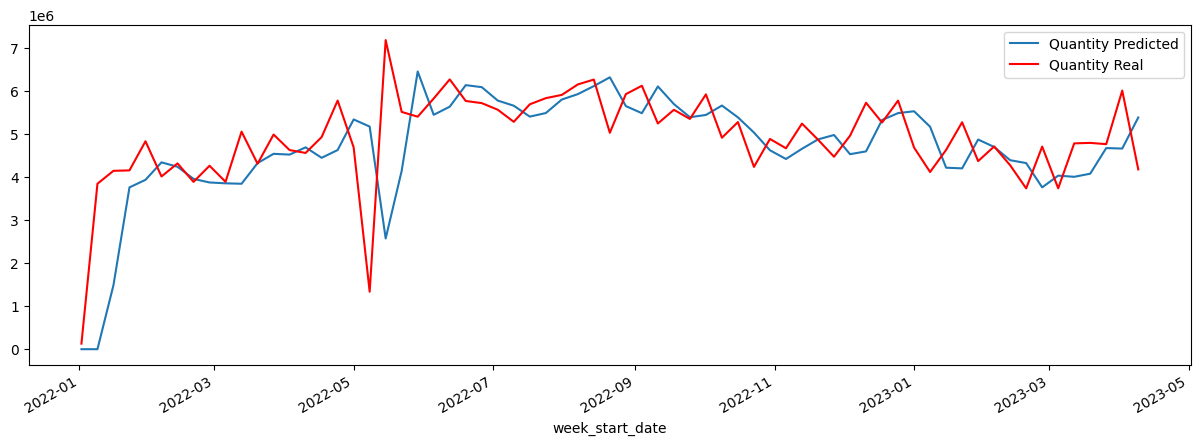

In [ ]:
# Trend Visualization between Real Values and Predicted Values

plt.figure(figsize=(15, 5))
plt.plot(quantity_flow1.index, y_pred_all_lr1, label='Quantity Predicted')
quantity_flow1.plot(color='red',label='Quantity Real')
plt.legend()

#### 4.6.2 - XGB Regressor

#### Baseline

In [ ]:
# Model Training XGB Regressor Baseline
model_xgb = XGBRegressor()
model_xgb.fit(X_train_scaled, y_train)

y_pred_train_xgb = model_xgb.predict(X_train_scaled)
y_pred_test_xgb = model_xgb.predict(X_test_scaled)

print('Train MAE:',mean_absolute_error(y_train, y_pred_train_xgb))
print('Test MAE:',mean_absolute_error(y_test, y_pred_test_xgb))

Train MAE: 179.54567307692307
Test MAE: 593955.0769230769


#### Improvement

In [ ]:
# Define grid for XGB Regressor

parameters_xgb = {'n_estimators': [100, 500, 1000],
                  'learning_rate': [0.01, 0.1, 0.5],
                  'max_depth': [3, 5, 7],
                  'subsample': [0.5, 0.7, 1],
                  'colsample_bytree': [0.5, 0.7, 1]}
              
grid_xgb = GridSearchCV(estimator=model_xgb, param_grid = parameters_xgb, cv = 5, scoring='neg_mean_absolute_error')
grid_xgb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Show results from Grid Search XGB Regressor

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_xgb.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_xgb.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_xgb.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

 The best score across ALL searched params:
 -646053.1640909091

 The best parameters across ALL searched params:
 {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimato

In [ ]:
# Model Training XGB Regressor Improvement using best params
model_xgb1 = XGBRegressor(colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5)
model_xgb1.fit(X_train_scaled, y_train)

y_pred_train_xgb1 = model_xgb1.predict(X_train_scaled)
y_pred_test_xgb1 = model_xgb1.predict(X_test_scaled)

print('Train MAE:',mean_absolute_error(y_train, y_pred_train_xgb1))
print('Test MAE:',mean_absolute_error(y_test, y_pred_test_xgb1))

Train MAE: 195833.00240384616
Test MAE: 545329.9423076923


In [ ]:
# Combines All Prediction into One NumPy Array

y_pred_all_xgb1 = np.concatenate([np.array([0, 0]), y_pred_train_xgb1, y_pred_test_xgb1], axis=0)
y_pred_all_xgb1

array([      0.   ,       0.   , 4137035.   , 4227177.   , 4655859.5  ,
       4133773.5  , 4742065.   , 4005716.25 , 4577918.5  , 4005716.25 ,
       4792647.   , 4364433.5  , 4919374.5  , 4859291.   , 4771795.5  ,
       4905284.5  , 5597826.   , 4772263.   , 1975367.125, 6804519.5  ,
       5303355.5  , 5449168.   , 5732398.   , 6079430.5  , 5763796.5  ,
       5625139.   , 5701804.   , 5556466.   , 5665811.   , 5506148.   ,
       5949484.5  , 6005856.   , 5998087.   , 5093763.5  , 5565212.   ,
       5599176.5  , 5582380.5  , 5560403.   , 5134674.5  , 5710613.   ,
       5434817.   , 5204566.   , 4591579.   , 5004615.   , 4669379.   ,
       4944293.   , 4844892.   , 4684752.5  , 4928213.   , 5380167.5  ,
       5034363.   , 5620415.   , 5111922.5  , 3719473.   , 4840868.5  ,
       4336865.   , 4821710.5  , 4939683.5  , 4171961.25 , 4902159.   ,
       4689608.   , 3715860.25 , 4803513.   , 3767604.75 , 4546484.5  ,
       4452156.5  , 5319304.   ])

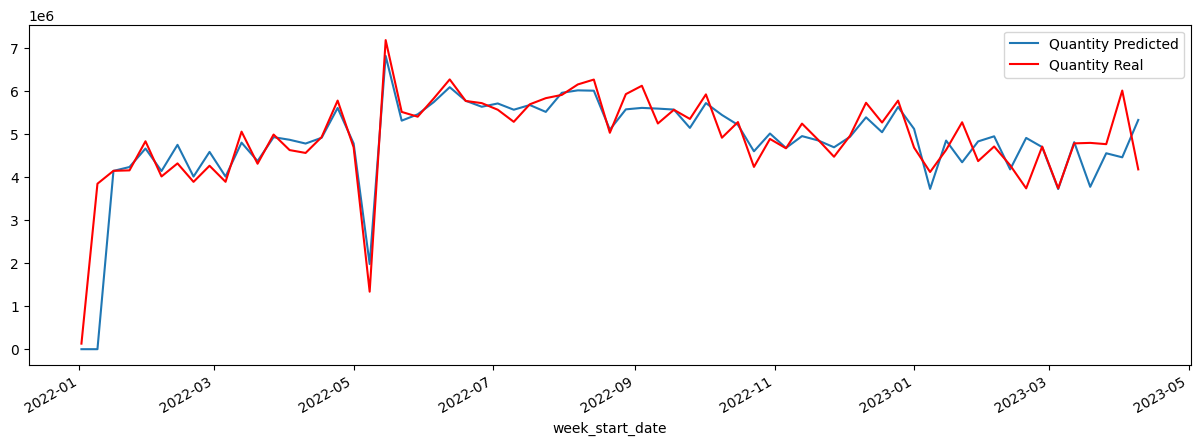

In [ ]:
# Trend Visualization between Real Values and Predicted Values

plt.figure(figsize=(15, 5))
plt.plot(quantity_flow1.index, y_pred_all_xgb1, label='Quantity Predicted')
quantity_flow1.plot(color='red', label='Quantity Real')
plt.legend()

#### 4.6.3 - Random Forest Regressor

#### Baseline

In [ ]:
# Model Training Random Forest Regressor Baseline
model_rnd = RandomForestRegressor()
model_rnd.fit(X_train_scaled, y_train)

y_pred_train_rnd = model_rnd.predict(X_train_scaled)
y_pred_test_rnd = model_rnd.predict(X_test_scaled)

print('Train MAE:',mean_absolute_error(y_train, y_pred_train_rnd))
print('Test MAE:',mean_absolute_error(y_test, y_pred_test_rnd))

Train MAE: 212512.13076923077
Test MAE: 545923.5046153846


#### Improvement

In [ ]:
# Define grid for Random Forest Regressor

parameters_rnd = {'n_estimators': [100, 500, 1000],
                  'max_depth': [3, 5, 7],
                  'max_features': ['sqrt', 'log2', None],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}
              
grid_rnd= GridSearchCV(estimator=model_rnd, param_grid = parameters_rnd, cv = 5, scoring='neg_mean_absolute_error')
grid_rnd.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Show results from Grid Search Random Forest Regressor

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_rnd.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_rnd.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_rnd.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=3, max_features=None, min_samples_split=10)

 The best score across ALL searched params:
 -553486.0951466041

 The best parameters across ALL searched params:
 {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Model Training Random Forest Regressor Improvement using best params
model_rnd1 = RandomForestRegressor(max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
model_rnd1.fit(X_train_scaled, y_train)

y_pred_train_rnd1 = model_rnd1.predict(X_train_scaled)
y_pred_test_rnd1 = model_rnd1.predict(X_test_scaled)

print('Train MAE:',mean_absolute_error(y_train, y_pred_train_rnd1))
print('Test MAE:',mean_absolute_error(y_test, y_pred_test_rnd1))

Train MAE: 367902.99719781027
Test MAE: 526070.1284874284


In [ ]:
# Combines All Prediction into One NumPy Array

y_pred_all_rnd1 = np.concatenate([np.array([0, 0]), y_pred_train_rnd1, y_pred_test_rnd1], axis=0)
y_pred_all_rnd1

array([      0.        ,       0.        , 4354588.58451086,
       4346807.99388586, 4443319.68694612, 4424972.20656517,
       4592786.21245165, 4345382.64827475, 4542447.98699084,
       4345382.64827475, 4542301.78632417, 4805750.23524679,
       4605990.08812371, 4911630.72531712, 4607589.58867927,
       4595350.06727913, 5057876.75511115, 5130652.12188973,
       2743380.98525688, 6261748.34425747, 5023945.18927987,
       5545236.28505251, 5692413.51881358, 5695383.41147596,
       5678877.55723222, 5549384.45171764, 5689561.35322281,
       5685453.15492611, 5675069.08526358, 5454517.22016586,
       5728600.04257476, 5708171.56868947, 5691594.75160133,
       5542812.61735862, 5425178.34021085, 5467850.34636291,
       5584998.99355323, 5454621.2115848 , 5373022.1858775 ,
       5692413.51881358, 5492749.45207063, 5161811.93088387,
       5073251.36301653, 4614418.18691422, 4576152.59318112,
       4603291.85990149, 5050953.76180634, 4635701.8375632 ,
       4606999.29790149,

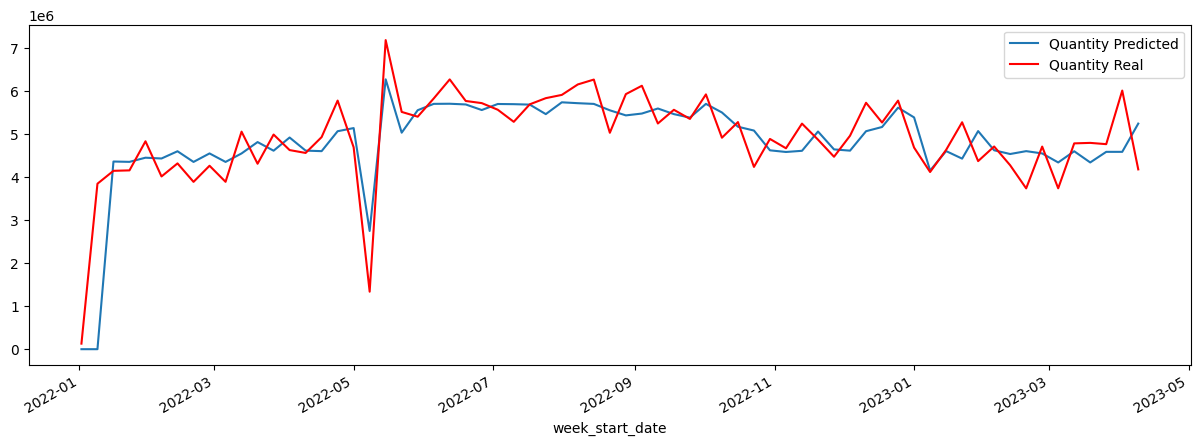

In [ ]:
# Trend Visualization between Real Values and Predicted Values

plt.figure(figsize=(15, 5))
plt.plot(quantity_flow1.index, y_pred_all_rnd1, label='Quantity Predicted')
quantity_flow1.plot(color='red', label='Quantity Real')
plt.legend()

#### 4.6.4 - Gradient Boosting Regressor

#### Baseline

In [ ]:
# Model Training Gradient Boosting Regressor Baseline
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train_scaled, y_train)

y_pred_train_gbr = model_gbr.predict(X_train_scaled)
y_pred_test_gbr = model_gbr.predict(X_test_scaled)

print('Train MAE:',mean_absolute_error(y_train, y_pred_train_gbr))
print('Test MAE:',mean_absolute_error(y_test, y_pred_test_gbr))

Train MAE: 72977.51176445227
Test MAE: 579029.5030176926


#### Improvement

In [ ]:
# Define grid for GBR

parameters_gbr = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}
              
grid_GBR = GridSearchCV(estimator=model_gbr, param_grid = parameters_gbr, cv = 5, scoring='neg_mean_absolute_error')
grid_GBR.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Show results from Grid Search GBR

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=4, subsample=0.1)

 The best score across ALL searched params:
 -583388.1907675435

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.1}


In [ ]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_GBR.best_params_)

# Use the best hyperparameters to create a new instance of the model
model_gbr1 = GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=100, subsample=0.1)
model_gbr1.fit(X_train_scaled, y_train)

y_pred_train_gbr1 = model_gbr1.predict(X_train_scaled)
y_pred_test_gbr1 = model_gbr1.predict(X_test_scaled)

# Print the mean absolute error on training and test data
print('Train MAE:',mean_absolute_error(y_train, y_pred_train_gbr1))
print('Test MAE:',mean_absolute_error(y_test, y_pred_test_gbr1))

Best hyperparameters:  {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.1}
Train MAE: 505986.13310460385
Test MAE: 525222.5755075988


In [ ]:
# Combines All Prediction into One NumPy Array

y_pred_all_gbr1 = np.concatenate([np.array([0, 0]), y_pred_train_gbr1, y_pred_test_gbr1], axis=0)
y_pred_all_gbr1

array([      0.        ,       0.        , 4416048.60717147,
       4467516.23233038, 4524898.39808348, 4678311.28671811,
       4521267.36992837, 4520936.65476043, 4539628.87798894,
       4482504.86808715, 4561814.09848813, 4843935.79848863,
       4595414.41722609, 4943424.64956153, 4589959.01221706,
       4653778.63355315, 4995621.37721896, 5081302.5210227 ,
       4478247.70049941, 5275047.95717905, 5055755.58544963,
       5218257.76172185, 5291362.73636044, 5308977.11292808,
       5350546.90020176, 5254470.57807227, 5310371.70147268,
       5313740.64531312, 5202521.86228369, 5386395.43608252,
       5323044.15584068, 5347710.98788819, 5306203.32877262,
       5302604.77737455, 4990024.84719721, 5246599.44361609,
       5303332.77453751, 5016800.88230926, 5310502.41484952,
       5228937.01311286, 5446178.75621097, 4855416.7527014 ,
       4982190.46979801, 4652860.00088635, 4766176.46236956,
       4533940.42165376, 5125446.99945276, 4926019.52994898,
       4573177.80517132,

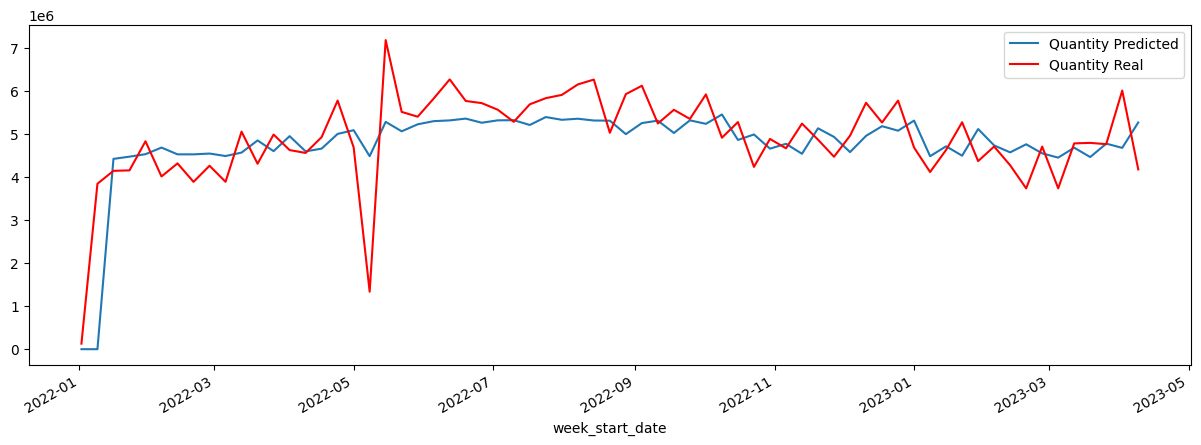

In [ ]:
# Trend Visualization between Real Values and Predicted Values

plt.figure(figsize=(15, 5))
plt.plot(quantity_flow1.index, y_pred_all_gbr1, label='Quantity Predicted')
quantity_flow1.plot(color='red', label='Quantity Real')
plt.legend()

#### 4.6.5 - Best Model

In [ ]:
# Show MAE Score in Baseline Model

all_reports = {}
score_reports = {
    'MAE Score Train Lin Reg' : mean_absolute_error(y_train,y_pred_train),
    'MAE Score Test Lin Reg' : mean_absolute_error(y_test,y_pred_test),
    'MAE Score Train XGB' : mean_absolute_error(y_train, y_pred_train_xgb),
    'MAE Score Test XGB' : mean_absolute_error(y_test, y_pred_test_xgb),
    'MAE Score Train Random Forest' : mean_absolute_error(y_train, y_pred_train_rnd),
    'MAE Score Test Random Forest' : mean_absolute_error(y_test, y_pred_test_rnd),
    'MAE Score Train Gradient Boosting' : mean_absolute_error(y_train, y_pred_train_gbr),
    'MAE Score Test Gradient Boosting' : mean_absolute_error(y_test, y_pred_test_gbr),
}
all_reports['Baseline Model'] = score_reports
pd.DataFrame(all_reports)

,Baseline Model
MAE Score Test Gradient Boosting,579029.503018
MAE Score Test Lin Reg,531353.637673
MAE Score Test Random Forest,545923.504615
MAE Score Test XGB,593955.076923
MAE Score Train Gradient Boosting,72977.511764
MAE Score Train Lin Reg,569021.649216
MAE Score Train Random Forest,212512.130769
MAE Score Train XGB,179.545673


In [ ]:
# Compare MAE Score between Baseline dan After Tuning

score_reports = {
    'MAE Score Train Lin Reg' : mean_absolute_error(y_train,y_pred_train_lr1),
    'MAE Score Test Lin Reg' : mean_absolute_error(y_test,y_pred_test_lr1),
    'MAE Score Train XGB' : mean_absolute_error(y_train, y_pred_train_xgb1),
    'MAE Score Test XGB' : mean_absolute_error(y_test, y_pred_test_xgb1),
    'MAE Score Train Random Forest' : mean_absolute_error(y_train, y_pred_train_rnd1),
    'MAE Score Test Random Forest' : mean_absolute_error(y_test, y_pred_test_rnd1),
    'MAE Score Train Gradient Boosting' : mean_absolute_error(y_train, y_pred_train_gbr1),
    'MAE Score Test Gradient Boosting' : mean_absolute_error(y_test, y_pred_test_gbr1),
}
all_reports['After Tuning'] = score_reports
pd.DataFrame(all_reports)

,Baseline Model,After Tuning
MAE Score Train Lin Reg,569021.649216,655602.214912
MAE Score Test Lin Reg,531353.637673,620717.259537
MAE Score Train XGB,179.545673,195833.002404
MAE Score Test XGB,593955.076923,545329.942308
MAE Score Train Random Forest,212512.130769,367902.997198
MAE Score Test Random Forest,545923.504615,526070.128487
MAE Score Train Gradient Boosting,72977.511764,505986.133105
MAE Score Test Gradient Boosting,579029.503018,525222.575508


Setelah dilakukan training dan evaluation model, didapatkan tabel seperti di atas. Tabel di atas berisi nilai MAE setiap algoritma yang digunakan pada **Baseline dan Improvement (After Tuning) Model**.

Berdasarkan hasil di atas, dapat disimpulkan bahwa model yang terbaik adalah **Linear Regression: Baseline Model** dengan MAE Score pada `Train-Set: 569021.65` dan pada `Test-Set: 531353.63`. Menentukan algoritma ini sebagai model terbaik karena pertimbangan yaitu memiliki MAE score lebih stabil dibanding algoritma lain, nilai Train-Set lebih besar dari nilai Test-Set, MAE Score lebih kecil dibanding Improvement Model.

Pada algoritma lain, nilai Train-Set lebih kecil dari Test-Set serta memiliki selisih yang cukup besar, dapat diindikasikan bahwa model pada algoritma lain cenderung overfitting. Model yang overfit dapat menyebabkan perusahaan mungkin akan membeli terlalu banyak stok atau merencanakan produksi yang berlebihan, sehingga menghasilkan pengeluaran yang tidak efisien dan menyebabkan kerugian finansial.

#### 4.6.6 - Model Analysis

In [ ]:
# Combines All Prediction (Linear Regression: Baseline) into One NumPy Array

y_pred_all = np.concatenate([np.array([0, 0]), y_pred_train, y_pred_test], axis=0)
y_pred_all

array([      0.        ,       0.        , 3998868.17024739,
       4729520.57812763, 4786428.80484129, 4886600.5882499 ,
       4892790.05694575, 4785764.40534113, 4779501.84211246,
       4754617.94113203, 4769587.45579761, 4870039.550785  ,
       4977166.42197733, 4937918.70251328, 5010884.98039581,
       4934446.87064352, 4975653.26294861, 5167084.52659375,
       5166118.94757111, 4477616.43009084, 4707193.86754346,
       5545530.01178518, 5220826.93016869, 5261805.04874745,
       5404493.15452282, 5413644.81199877, 5313750.57165072,
       5282196.82002479, 5212936.12330788, 5220133.65780454,
       5316152.63054666, 5353566.84315511, 5402897.11711534,
       5464330.17720366, 5305504.20103227, 5207455.31128071,
       5401786.09892824, 5310338.3633919 , 5194498.02055013,
       5222414.94929295, 5266058.93840664, 5225127.16459281,
       5091832.01608878, 5007593.29137875, 4909432.39813008,
       4998008.4649253 , 5041273.41942152, 5093054.47097294,
       4966327.21826408,

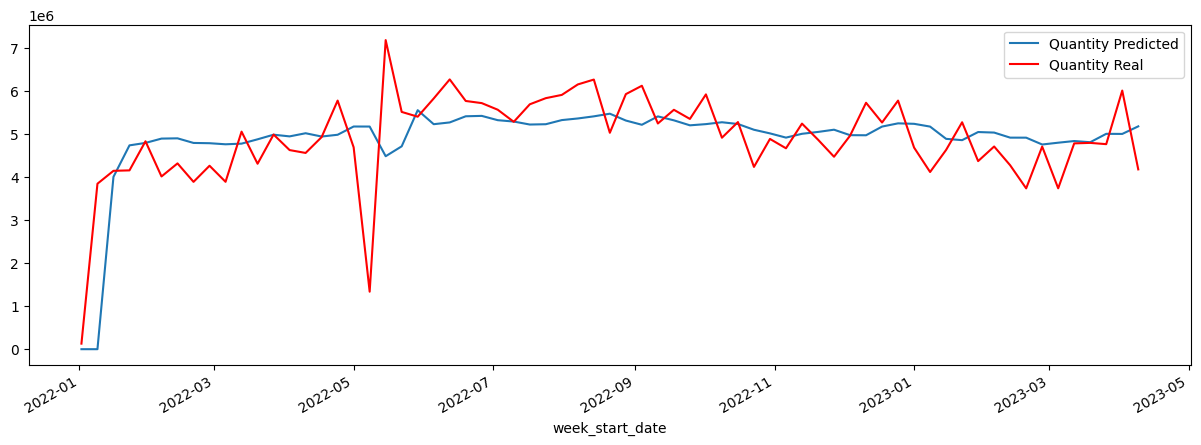

In [ ]:
# Trend Visualization between Real Values and Predicted Values

plt.figure(figsize=(15, 5))
plt.plot(quantity_flow1.index, y_pred_all, label='Quantity Predicted')
quantity_flow1.plot(color='red',label='Quantity Real')
plt.legend()

Model terbaik yang akan digunakan untuk forecasting adalah **Linear Regression: Baseline Model** yang ditunjukkan grafik aktual dan prediksi seperti hasil visualisasi di atas. Model ini memiliki MAE Score sebagai berikut:
* Train MAE: 569021.6492159483
* Test MAE: 531353.6376728999

Hasil tersebut menunjukkan bahwa error pada train-set **lebih besar** dibanding test-set. Maka hal ini dapat menunjukkan bahwa model memiliki **performa yang lebih baik** dalam mempelajari pola-pola pada data train-set dibandingkan dengan data test-set. Selain kelebihan pada performa model tersebut, jika diterapkan dalam domain bisnis, akan memiliki kelebihan serta kekurangan lainnya.

**Kelebihan Model**

1. **Prediksi lebih akurat**. Model yang memiliki performa yang baik akan memberikan prediksi yang lebih akurat, sehingga memungkinkan perusahaan untuk mengambil keputusan yang lebih tepat dan efektif.
2. **Peningkatan efisiensi**. Dengan prediksi yang lebih akurat, perusahaan dapat meningkatkan efisiensi operasional dengan mengoptimalkan produksi, mengelola inventaris, atau mengalokasikan sumber daya secara lebih efektif.
3. **Peningkatan keuntungan**. Dengan prediksi yang lebih akurat, perusahaan dapat meningkatkan keuntungan dengan mengurangi kerugian dan meningkatkan penjualan.
4. **Penghematan waktu dan biaya**. Dengan menggunakan model yang memiliki performa yang baik, perusahaan dapat menghemat waktu dan biaya yang diperlukan untuk melakukan analisis data dan membuat keputusan.

**Kekurangan Model**

1. **Model cenderung memprediksi di bawah aktual**. Hal ini dapat menyebabkan perusahaan saat produksi menghasilkan produk yang lebih sedikit. Sehingga dikhawatirkan ketika terjadi lonjakan penjualan, gudang tidak memiliki stok produk.
2. **Terjadi selisih stok produk di gudang**. Produk yang tersimpan di gudang tidak selamanya akan berada dalam kondisi yang baik karena, ada nilai penyusutan yang terjadi atau produk rusak.
3. **Stock opname bertambah**. Jika prediksi di bawah aktual, maka dikhawatirkan bertambahnya stock opname, sehingga perusahaan harus mengontrol produk yang ada.
4. **Tidak dapat memprediksi persaingan pasar**. Karena butuh data trend pasar serta kompetitor.

Referensi: 
* https://www.paper.id/blog/tips-dan-nasihat-umkm/selisih-stock-gudang/#:~:text=Berikut%20penyebab-penyebab%20yang%20kerap%20muncul%20dalam%20pengelolaan%20barang%3A,barang%20...%204%20Stock%20opname%20yang%20salah%20
* https://kledo.com/blog/faktor-yang-mempengaruhi-penjualan/


### 4.7 - Model Inference

Bab ini berisi *forecasting* data menggunakan model terbaik yaitu, Linear Regression Baseline Model. Prediksi penjualan akan dilakukan selama **13 pekan ke depan**. Pemilihan prediksi selama 13 minggu karena periode waktu yang tepat. Tiga belas minggu umumnya dianggap sebagai periode titik tengah yang masuk akal; cukup singkat untuk memberikan visibilitas dan akurasi waktu nyata (satu kuartal kalender) tetapi cukup lama untuk memberikan wawasan bisnis yang bersifat strategis [[8]](https://bhcagroup.com/13-week-cash-flow).

Selain itu, prediksi 13 minggu memungkinkan bisnis untuk memprediksi arus kasnya untuk kuartal fiskal penuh. Biasanya, semakin jauh perkiraan meluas, semakin kurang akurat. Profesional keuangan suka menggunakan prakiraan 13 minggu karena memungkinkan tim data membuat rencana ke depan sambil menemukan keseimbangan antara akurasi prakiraan dan nilai strategis [[9]](https://trovata.io/blog/13-week-cash-forecast-6-steps/).

In [ ]:
# Function to Predict Quantity in Next n-weeks

from datetime import datetime, timedelta

def forecasting(month):
  # :param month : how many months to predict

  quantity_forecast = quantity_flow1.copy()
  window = 2
  for i in range(month):
    X = np.array(quantity_forecast[-window:].values).reshape(1, -1)
    X_scaled = scaler.transform(X)
    new_idx = quantity_forecast.index[-1] + timedelta(weeks=1)
    quantity_forecast[new_idx] = round(model_lr.predict(X_scaled)[0])

    print('i : ', i)
    print('X : ', X)
    print('X_scaled : ', X_scaled)
    print('new_idx : ', new_idx)
    print('sales_forecast[new_idx] : ', quantity_forecast[new_idx])
    print('')

  return quantity_forecast

In [ ]:
# Displax `quantity_flow` DataFrame

quantity_flow1

week_start_date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-03-12    4775638
2023-03-19    4787111
2023-03-26    4757590
2023-04-02    6001166
2023-04-09    4172070
Freq: W-SUN, Name: quantity, Length: 67, dtype: int64

i :  0
X :  [[6001166 4172070]]
X_scaled :  [[0.83374668 0.48611359]]
new_idx :  2023-04-16 00:00:00
sales_forecast[new_idx] :  5134581

i :  1
X :  [[4172070 5134581]]
X_scaled :  [[0.57405496 0.6509833 ]]
new_idx :  2023-04-23 00:00:00
sales_forecast[new_idx] :  4936032

i :  2
X :  [[5134581 4936032]]
X_scaled :  [[0.71071052 0.61697359]]
new_idx :  2023-04-30 00:00:00
sales_forecast[new_idx] :  5085343

i :  3
X :  [[4936032 5085343]]
X_scaled :  [[0.6825209  0.64254926]]
new_idx :  2023-05-07 00:00:00
sales_forecast[new_idx] :  5070317

i :  4
X :  [[5085343 5070317]]
X_scaled :  [[0.7037198  0.63997544]]
new_idx :  2023-05-14 00:00:00
sales_forecast[new_idx] :  5095775

i :  5
X :  [[5070317 5095775]]
X_scaled :  [[0.70158644 0.64433617]]
new_idx :  2023-05-21 00:00:00
sales_forecast[new_idx] :  5096699

i :  6
X :  [[5095775 5096699]]
X_scaled :  [[0.70520092 0.64449444]]
new_idx :  2023-05-28 00:00:00
sales_forecast[new_idx] :  5101547

i :  7
X :  [[5096699 5101547]]
X_scaled 

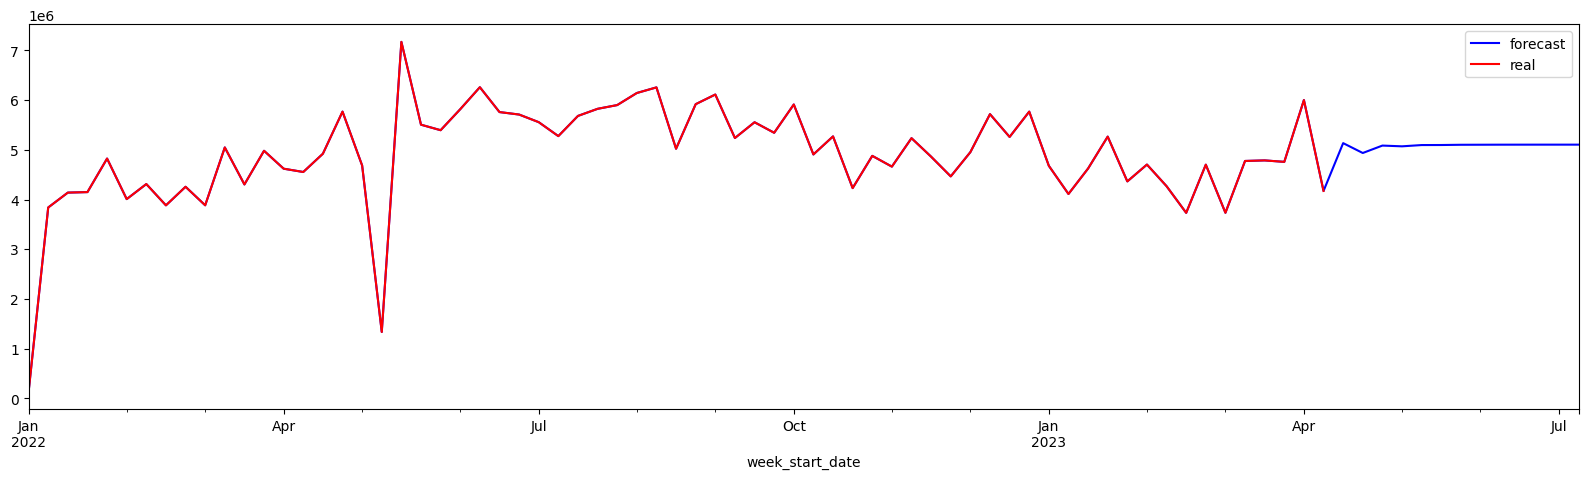

In [ ]:
# Forecast for the Next 13 weeks

quantity_forecast = forecasting(13)
quantity_forecast.plot(color='blue',label='forecast',figsize=(20,5))
quantity_flow1.plot(color='red',label='real')
plt.legend()

Berdasarkan hasil visualisasi grafik prediksi di atas, menunjukkan bahwa:

*  **Bulan April 2023 ke Mei 2023 terjadi penurunan penjualan stok gudang**. Hal ini hampir mirip dengan tahun 2022 pada bulan yang sama. Penurunan penjualan pada 2023 ini dapat dikatakan karena akan terjadi libur Hari Raya Idul Fitri 1444 H yang jatuh pada tanggal 21-22 April 2023. Saat libur Hari Raya Idul Fitri, akan memengaruhi operasional pada perusahaan karena ditetapkan cuti bersama oleh Presiden. Sehingga kemungkinan besar perusahaan akan menetapkan cuti bersama dan semua marketplace akan diliburkan selama liburan. Sehingga pemesanan saat mendekati libur akan di*hold* dan diproses kembali setelah dibuka.
*   **Setelah libur lebaran 2023 usai**, memasuki minggu pertama Mei akan terjadi **peningkatan penjualan** karena pemesanan produk yang pengirimannya ditunda saat libur lebaran akan dikirimkan. Serta operasional perusahaan berjalan normal kembali. Sehingga para pembeli dapat melakukan transaksi secara normal. Dan kemungkinan peningkatan penjualan juga diakibatkan karena pembeli telah mendapatkan THR setelah libur lebaran.
* **Bulan Mei hingga Juli 2023**, terlihat peningkatan dan penurunan penjualan tidak terlalu memiliki selisih yang signifikan. Hal ini juga bisa dibuktikan dengan trend tahun 2022, di mana tingkat penjualan Mei - Juli 2022 cenderung stabil.



In [ ]:
# Display Forecasted DataFrame

quantity_forecast

week_start_date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-06-11    5103449
2023-06-18    5103761
2023-06-25    5103996
2023-07-02    5104088
2023-07-09    5104145
Freq: W-SUN, Name: quantity, Length: 80, dtype: int64

Pembuatan dataframe `quantity_forecast` di atas dimaksudkan untuk menyimpan data sebelum dan sesudah prediksi. Kemudian, akan dilakukan pengecekan prediksi selama 6 pekan ke depan seperti di bawah ini.

### 4.8 - Display Inference

In [ ]:
# Display Forecast of `quantity sales` from 6 weeks later

quantity_forecast = forecasting(6)
print(quantity_forecast.loc['2023-05-01':'2023-05-31'])

i :  0
X :  [[6001166 4172070]]
X_scaled :  [[0.83374668 0.48611359]]
new_idx :  2023-04-16 00:00:00
sales_forecast[new_idx] :  5134581

i :  1
X :  [[4172070 5134581]]
X_scaled :  [[0.57405496 0.6509833 ]]
new_idx :  2023-04-23 00:00:00
sales_forecast[new_idx] :  4936032

i :  2
X :  [[5134581 4936032]]
X_scaled :  [[0.71071052 0.61697359]]
new_idx :  2023-04-30 00:00:00
sales_forecast[new_idx] :  5085343

i :  3
X :  [[4936032 5085343]]
X_scaled :  [[0.6825209  0.64254926]]
new_idx :  2023-05-07 00:00:00
sales_forecast[new_idx] :  5070317

i :  4
X :  [[5085343 5070317]]
X_scaled :  [[0.7037198  0.63997544]]
new_idx :  2023-05-14 00:00:00
sales_forecast[new_idx] :  5095775

i :  5
X :  [[5070317 5095775]]
X_scaled :  [[0.70158644 0.64433617]]
new_idx :  2023-05-21 00:00:00
sales_forecast[new_idx] :  5096699

week_start_date
2023-05-07    5070317
2023-05-14    5095775
2023-05-21    5096699
Freq: W-SUN, Name: quantity, dtype: int64


Hasil di atas menunjukkan bahwa:

*   Minggu ke-3 April (`2023-04-16`) terjadi kenaikan penjualan produk dari minggu sebelumnya. Hal ini dapat dimungkinkan karena menuju hari Raya Idul Fitri, permintaan pasar terkait *makeup* akan meningkat. Peningkatan ini karena para perempuan yang mayoritas suka terhadap kosmetik, akan membeli kosmetik baru untuk menyambut Hari Raya Idul Fitri saat bertemu kerabat dan keluarga.
*   Minggu ke-4 April (`2023-04-23`) terjadi penurunan penjualan karena minggu tersebut adalah cuti bersama Hari Raya idul Fitri se-Indonesia. Sehingga dipastikan operasional perusahaan akan libur sejenak.
*  Minggu ke-5 April - minggu ke-4 Mei, terlihat bahwa penjualan terus mengalami kenaikan karena libur lebaran telah usai. Serta dapat didukung karena adanya promo tanggal dan bulan kembar, yaitu `5.5`.



### 4.9 - Model Saving

Bab ini bertujuan untuk menyimpan hasil prediksi (*forecasting*) untuk ditampilkan ke *dashboard* visualisasi.

In [58]:
# Save the model
import pickle

with open('linreg_model.pkl', 'wb') as file_1:
  pickle.dump(model_lr, file_1)

with open('num_columns.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

In [54]:
# Save dataframe in csv

quantity_flow1.to_csv('quantity_flow1.csv', index=False)

## 5 - Conclusion/ Overall Analysis

#### 5.1 - EDA Analysis

Berdasarkan EDA, dapat disimpulkan bahwa:
1. Terdapat **2309 jenis produk** (SKU/ Stock Keeping Unit) yang berbeda.
2. Kolom jumlah produk terjual (`quantity`) dikelompokkan dengan (`week_start_date`). Hal ini bertujuan untuk mengetahui seberapa banyak stok gudang yang berhasil terjual setiap minggunya.
3. Berdasarkan hasil visualisasi grafik mingguan, bulanan, dan tahunan, menunjukkan bahwa penjualan mengalami kenaikan dan penurunan. Maka dapat disimpulkan bahwa penjualan produk atau stok gudang dipengaruhi oleh beberapa hal sebagai berikut:
  
  - *Annual event*, seperti Natal dan Tahun Baru, Hari Kemerdekaan Indonesia.
  - *Collaborative marketing*. Marketing yang dilakukan dengan influencers/aktor/aktris tertentu untuk meningkatkan penjualan produk. Biasanya terikat dalam perjanjian waktu dan menyediakan spesial diskon.
  - Hari Raya Idul Fitri, yang selalu mengalami perubahan waktu setiap tahunnya. Bulan Ramadan selama sebulan penuh dapat meningkatkan penjualan di saat puasa dan menyebabkan penurunan penjualan saat cuti bersama libur hari raya.
  - *Ecommerce campaign*, seperti diskon saat tanggal dan bulan sama (1.1, 2.2, ..., 12.12), diskon saat tanggal gajian (tanggal 25 setiap bulan).
  - Persaingan pasar dan permintaan produk.
  - Kompetitor.
  - Inovasi produk.
  - Harga yang dibandingkan dengan kompetitor.
  - *Digital marketing*. *Engagements* suatu produk akan memengaruhi daya tarik pembeli serta akan menjadi algoritma teratas pada sosial media, sehingga akan merekomendasikan kepada user.

#### 5.2 - Metodologi

Pemilihan metodologidan algoritma adalah sebagai berikut:
1. Data *cleaning* dilakukan dengan 3 tahap, yaitu mengubah tipe data, *handling missing values*, dan *handling duplicate data*. Hal ini dimaksudkan untuk membersihkan data dari data kosong, sehingga memudahkan untuk melakukan proses EDA dan *modeling*.
2. Manipulasi data yang dilakukan bertujuan untuk pengorganisasian data agar lebih mudah dipahami. Manipulasi data yang dilakukan pada kasus ini adalah:

  - Melakukan analisis deskriptif.
  - Mengelompokkan suatu kolom. Dalam kasus ini mengelompokkan jumlah produk terjual dengan periode mingguan.
  - Menghitung aggregat. Dalam kasus ini menghitung jumlah produk yang terjual.
  - Menambah kolom baru. Dlam kasus ini bertujuan untuk mengetahui details waktu (hari, bulan, tahun) penjualan produk.
  - Filtering data. Dalam kasus ini memfilter trend berdasarkan tahun untuk melihat *seasonality* dataset.
3. Pemilihan algoritma didasarkan karena dataset *time series* ini memiliki variabel dependen dan independen. Berdasarkan literatur, pemodelan menggunakan Regresi cocok untuk data ini karena terdapat **hubungan** antara waktu dengan jumlah barang yang terjual.

#### 5.3 - Further Improvement

Untuk model improvement dapat dilakukan:

1. Menambahkan teknik analisis *time series* lainnya seperti ARIMA atau SARIMA.
2. Dapat menggunakan metode Deep Learning untuk meningkatkan keakuratan *score* prediksi.
3. Membandingkan dengan *evaluation metrics* yang lain, seperti A*kaike Information Criterion* (AIC), *Root Mean Squared Error* (RMSE), *Mean Squared Error* (MSE), atau *R-squared* (R²).
4. Menambahkan analisis SKU mana yang paling laku di pasaran. Dengan cara cek RPP karton yang paling besar (jumlah karton terjual selama 1 pekan). Cara ini dapat meningkatkan keakuratan prediksi karena setiap SKU memiliki harga yang berbeda-beda. Serta melihat dari *week cover* (semakin lama di gudang semakin *slow moving*).
5. Menambahkan analisis perkembangan per SKU dengan melihat *growth* tahun lalu dan tahun ini; RPP karton; serta *week cover*.